In [82]:
import pandas as pd 
import scipy.interpolate  
import numpy as np
import matplotlib.pyplot as plt
from torch.nn.functional import normalize
from torch import tensor

In [5]:
plt.style.use('dark_background')

In [44]:
# data = pd.read_csv("../Datasets/sensorDataset/test/Breaker/f065ea34-14c6-418e-8d4a-8c0d1683c9f3.csv", header=None)

data = pd.read_csv("../Datasets/sensorDataset/test/Breaker/0d4e5eec-a3ed-412e-a47a-5165a57f3b7f.csv", header=None)

In [7]:

def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr

In [ ]:
data = data.to_numpy(dtype=np.float32, copy=True)

In [ ]:
transposedData = data.transpose()

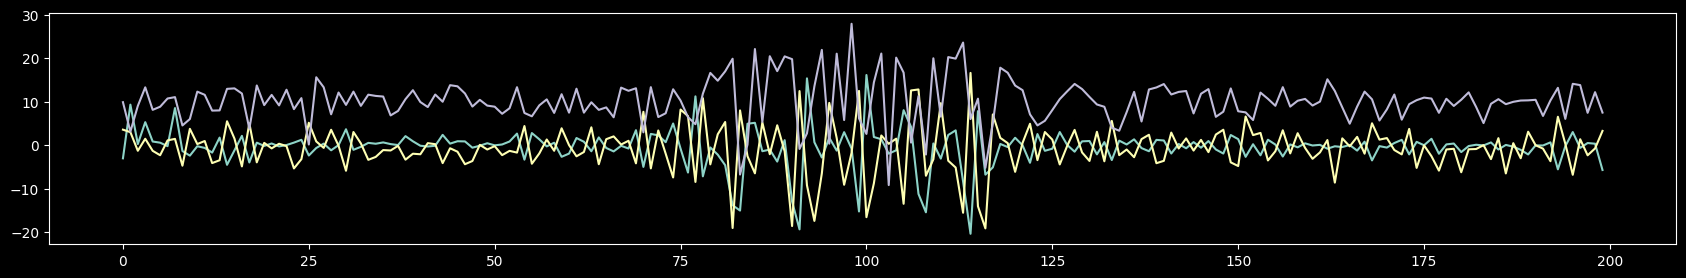

In [56]:
plt.figure(figsize=(21, 3))
for d in transposedData:
    plt.plot(d)
plt.show()

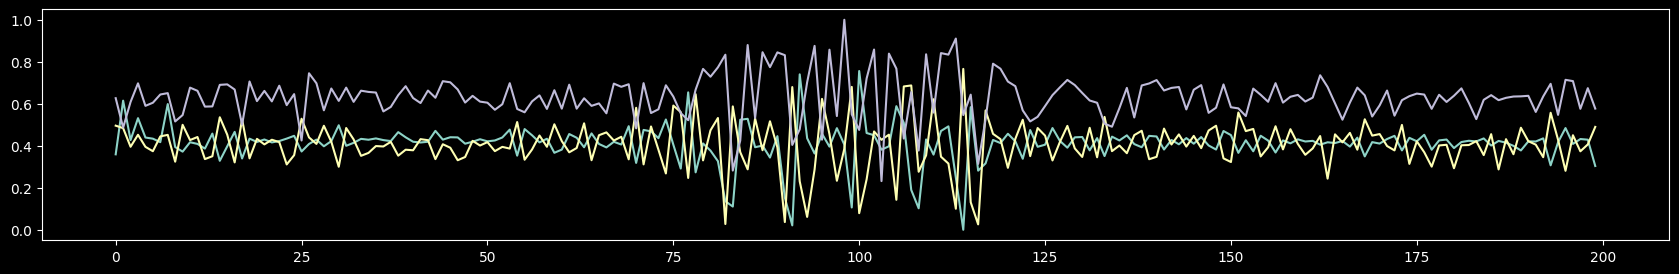

In [57]:
normalisedData = normalize_array(transposedData)
plt.figure(figsize=(21, 3))
for d in normalisedData:
    plt.plot(d)
plt.show()

In [76]:
scaleFactor = 5
smoothingFactor = 50

In [77]:
newData = []
for i in range(len(transposedData)):
    x = [(i * scaleFactor) for i in range(len(transposedData[i]))] 

    # make a spline function fit the data
    spl = scipy.interpolate.make_splrep(x, transposedData[i], s=smoothingFactor)
    interpolatedData = [spl(i) for i in range(len(transposedData[i]) * scaleFactor)]
    # interpolatedData = normalize_array(interpolatedData)
    # print(interpolatedData)
    newData.append(interpolatedData)

newData = normalize_array(newData)

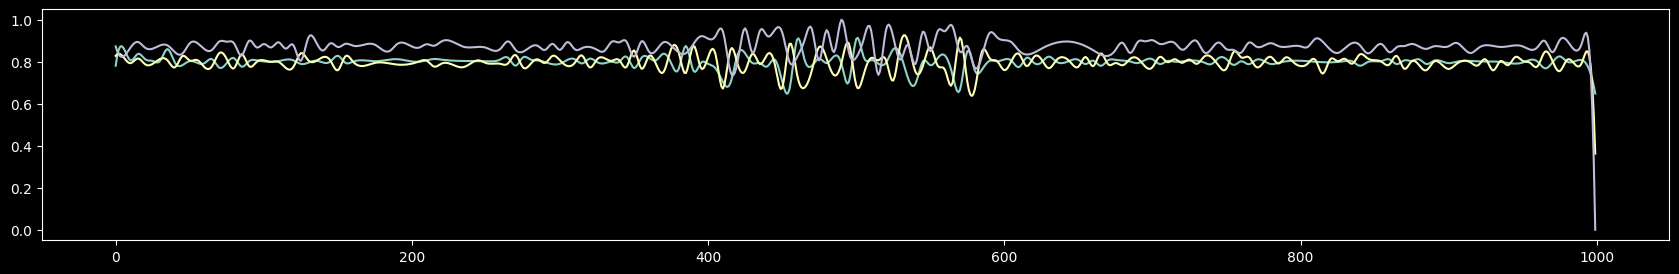

In [78]:
newData = np.asarray(newData)
plt.figure(figsize=(21, 3))
plt.plot(newData.transpose())
plt.show()

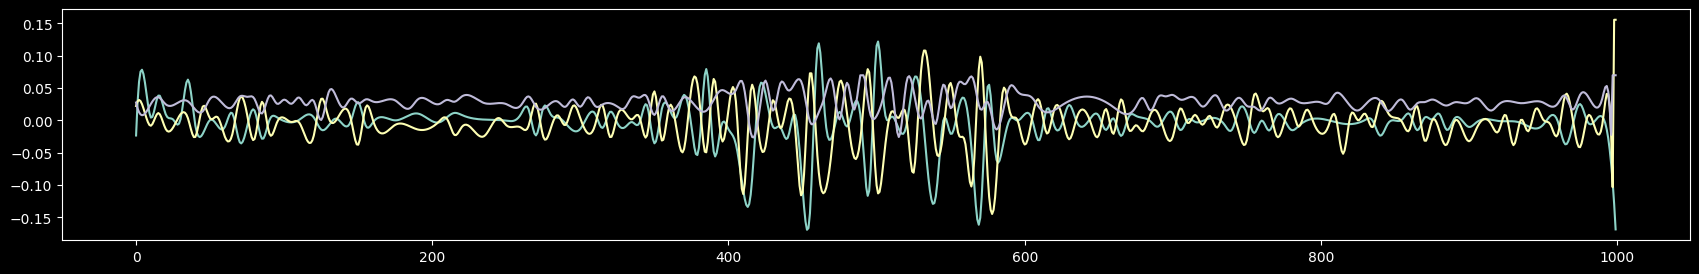

In [90]:

newData = tensor(newData)
newData = normalize(newData)
newData = np.asarray(newData)

plt.figure(figsize=(21, 3))
plt.plot(newData.transpose())
plt.show()

In [93]:
newData = []
for i in range(len(transposedData)):
    x = [(i * scaleFactor) for i in range(len(transposedData[i]))] 

    # transposedData = normalize_array(transposedData)

    # make a spline function fit the data
    spl = scipy.interpolate.make_splrep(x, transposedData[i], s=smoothingFactor)
    interpolatedData = [spl(i) if abs(spl(i)) < 25 else 25 for i in range(len(transposedData[i]) * scaleFactor)]
    # interpolatedData = normalize_array(interpolatedData)
    # print(interpolatedData)
    newData.append(interpolatedData)
newData = normalize_array(newData)

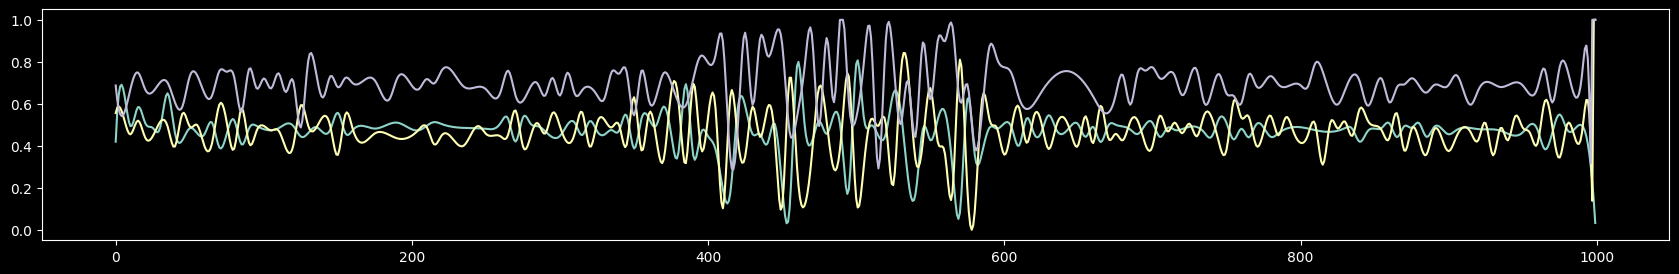

In [94]:
newData = np.asarray(newData)
plt.figure(figsize=(21, 3))
plt.plot(newData.transpose())
plt.show()

In [129]:
newData = []
for i in range(len(transposedData)):
    x = [(i * scaleFactor) for i in range(len(transposedData[i]))] 

    # transposedData = normalize_array(transposedData)

    # make a spline function fit the data
    spl = scipy.interpolate.make_splrep(x, transposedData[i], s=smoothingFactor)
    interpolatedData = [spl(i) if abs(spl(i)) < 25 else 25 for i in range(len(transposedData[i]) * scaleFactor)]
    # interpolatedData = normalize_array(interpolatedData)
    # print(interpolatedData)
    newData.append(interpolatedData)


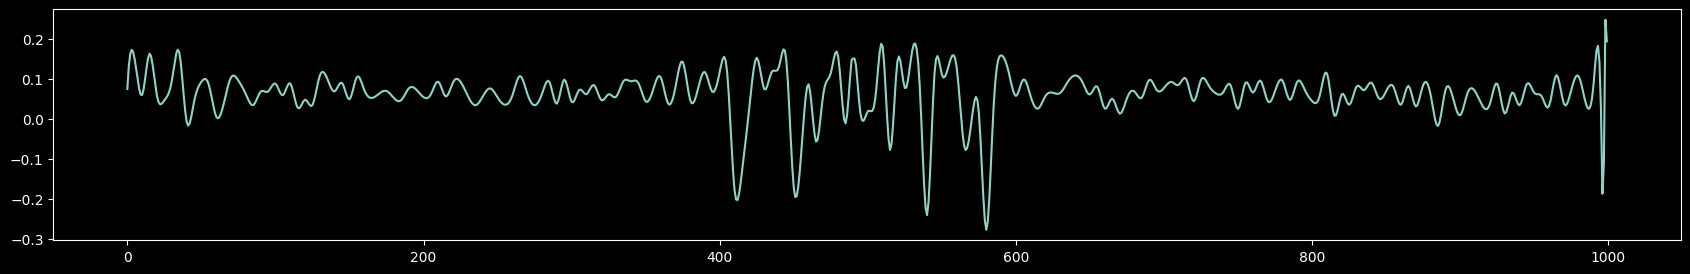

In [138]:
newData = np.asarray(newData, dtype=np.float32)
newData = tensor(newData)
newData = normalize(newData, p=6)
newData = np.asarray(newData)



transNewdata = newData.transpose()
transNewdata = [ np.average(val) for val in transNewdata]

plt.figure(figsize=(21, 3))
plt.plot(transNewdata)
plt.show()

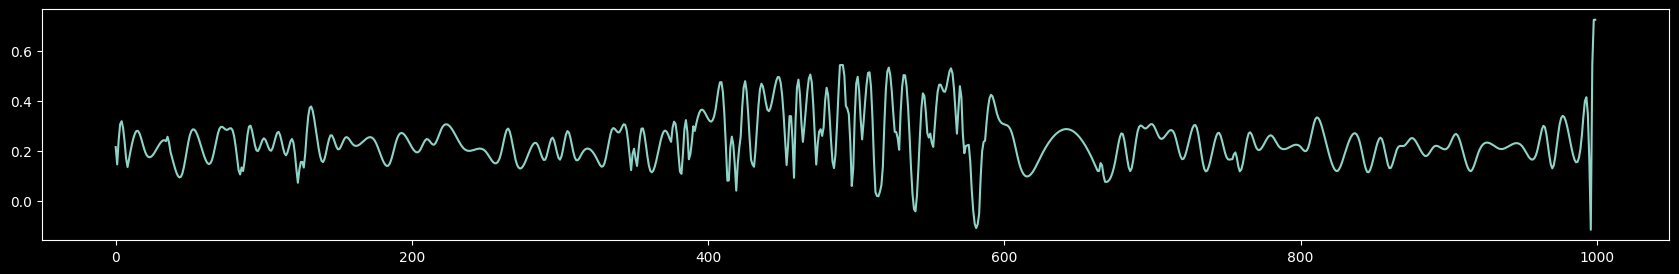

In [139]:
transNewdata = newData.transpose()
transNewdata = [ np.max(val) for val in transNewdata]

plt.figure(figsize=(21, 3))
plt.plot(transNewdata)
plt.show()

In [123]:
newData = np.asarray(newData, dtype=np.float32)
newData = tensor(newData)

In [119]:
def norm():
    newData = normalize(newData, p=6)

In [111]:
def norm1():
    newData = normalize_array(newData)

In [120]:
%timeit norm

12.5 ns ± 0.133 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [116]:
%timeit norm1

12.3 ns ± 0.0169 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


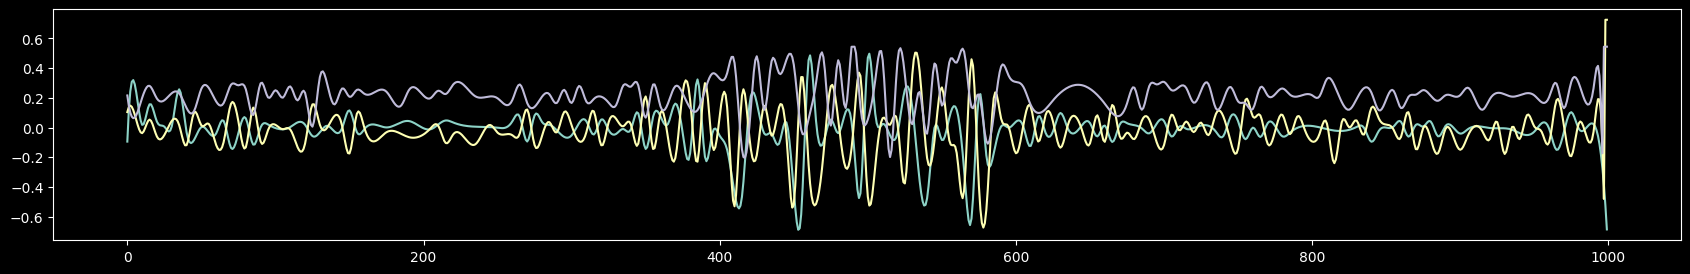

In [127]:
newData = np.asarray(newData, dtype=np.float32)
newData = tensor(newData)
newData = normalize(newData, p=6)
newData = np.asarray(newData)

plt.figure(figsize=(21, 3))
plt.plot(newData.transpose())
plt.show()

In [20]:
newData

array([[ 10.43232502,  12.65955497,  13.29369015, ...,  49.56669808,
         87.36221023, 139.26181962],
       [-10.11802123, -11.1717594 , -11.26672823, ..., -36.825489  ,
        -62.13949171, -96.35560746],
       [  4.20060007,   3.22747768,   1.24050936, ...,  53.74675266,
         98.24019454, 158.95224726]], shape=(3, 1000))